In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# version check

In [5]:
version = 'v2'

# label load

In [6]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# trained model load

In [10]:
encoder = load_model('./weights/residual_encoder_ls32_{}.h5'.format(version))
decoder = load_model('./weights/residual_decoder_ls32_{}.h5'.format(version))

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### train data

In [11]:
train_encode = encoder.predict(one_hot_train_labels)
train_encode

array([[0.4174012 , 3.1105583 , 3.6688392 , ..., 1.4128265 , 0.9025694 ,
        4.032192  ],
       [0.1560904 , 1.817906  , 2.516934  , ..., 1.1696125 , 0.95306337,
        1.2596723 ],
       [2.6154196 , 0.41953057, 3.0329173 , ..., 1.086341  , 2.6937103 ,
        3.2091131 ],
       ...,
       [1.9786024 , 1.9288311 , 2.1235225 , ..., 1.206674  , 1.6734363 ,
        2.9260395 ],
       [2.8313613 , 2.7319047 , 3.4127514 , ..., 1.0631727 , 1.3177092 ,
        2.3161683 ],
       [2.148395  , 1.330493  , 6.214635  , ..., 0.9051074 , 0.9000557 ,
        2.2766943 ]], dtype=float32)

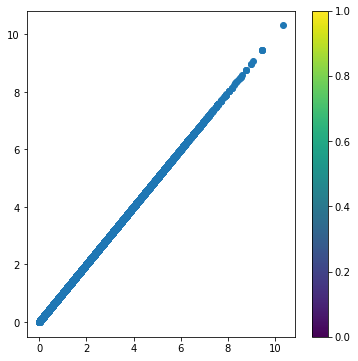

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(train_encode[:, :], train_encode[:, :])
plt.colorbar()
plt.show()

In [13]:
train_encode_df = pd.DataFrame(train_encode)
train_encode_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.417401,3.110558,3.668839,1.226133,2.162574,0.0,3.931701,2.592113,2.431996,2.476200,...,3.868774,3.319746,3.433081,2.390619,4.531190,2.798172,2.228583,1.412827,0.902569,4.032192
1,0.156090,1.817906,2.516934,0.445787,0.861615,0.0,1.786605,1.056361,3.568340,2.172769,...,0.765907,2.722389,2.902149,1.056934,3.805281,2.013745,0.807450,1.169613,0.953063,1.259672
2,2.615420,0.419531,3.032917,0.012062,4.051877,0.0,0.107185,2.249975,1.793349,3.025448,...,1.535463,1.525661,3.134440,3.392141,3.054707,2.136985,0.000000,1.086341,2.693710,3.209113
3,2.049675,1.346292,3.854792,0.000000,0.622733,0.0,2.288307,1.360127,2.699560,2.448431,...,0.000000,2.582102,3.751017,0.447963,2.649111,2.317543,0.984748,0.844156,0.903332,1.078584
4,3.056171,2.104629,2.814471,0.420903,2.857896,0.0,2.006338,1.256253,0.640941,2.060637,...,2.394616,2.801673,2.485481,3.802172,4.070567,2.348916,2.177757,0.869026,1.684833,1.638000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,4.186645,3.224278,2.117567,0.419262,0.000000,0.0,2.746918,1.778923,0.206681,4.238903,...,0.820696,3.612397,4.454446,1.590904,2.417366,5.644652,4.679737,1.634320,1.236829,0.237118
2801,3.364617,0.964592,0.363475,0.003237,1.230430,0.0,2.383199,1.191509,0.000000,5.663036,...,1.606773,4.367097,3.565836,3.955093,0.000000,1.233802,1.044027,0.285247,3.691920,2.591480
2802,1.978602,1.928831,2.123523,0.511366,1.142202,0.0,2.150192,2.086830,0.591417,3.308824,...,2.064874,2.610252,3.291699,0.881856,1.587655,2.168864,2.272126,1.206674,1.673436,2.926039
2803,2.831361,2.731905,3.412751,0.971666,2.699568,0.0,3.641780,2.886727,1.724109,2.706757,...,3.224768,2.851137,4.704193,2.255934,4.824238,2.652613,3.096685,1.063173,1.317709,2.316168


In [14]:
train_encode_df.to_excel('./rae_ls32_{}_latent_vector_train.xlsx'.format(version))

In [15]:
train_decode = decoder.predict(train_encode)
train_decode

array([[3.0326231e-16, 2.6906069e-04, 2.9254103e-19, ..., 2.2930196e-06,
        8.3798444e-27, 9.1020574e-10],
       [1.3388117e-15, 2.1745501e-10, 3.9927913e-12, ..., 8.6104253e-14,
        6.2989161e-23, 4.3960626e-05],
       [1.8914054e-25, 2.2423569e-19, 1.1917609e-08, ..., 1.5923554e-14,
        1.5539427e-16, 2.8969253e-19],
       ...,
       [3.4268180e-07, 1.9935679e-04, 6.7603537e-06, ..., 1.7157499e-06,
        1.2039496e-12, 2.7173466e-09],
       [2.7588536e-17, 7.1346046e-10, 7.7775275e-16, ..., 5.1336774e-15,
        4.0666485e-14, 7.5473539e-10],
       [1.6238164e-23, 7.1109994e-16, 1.2212968e-22, ..., 2.4393690e-14,
        3.9743592e-23, 1.5624017e-15]], dtype=float32)

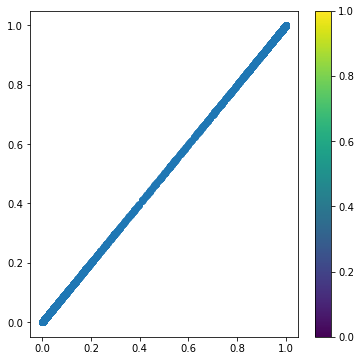

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train_decode[:, :], train_decode[:, :])
plt.colorbar()
plt.show()

In [17]:
train_predict = train_decode.round()
train_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
"""train_predict = np.where(train_decode > 0.5, 1, 0)
train_predict"""

'train_predict = np.where(train_decode > 0.5, 1, 0)\ntrain_predict'

In [19]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [20]:
#c_matrix.shape

In [21]:
#c_matrix

In [22]:
print('accuracy : ', accuracy_score(one_hot_train_labels, train_predict))
print('precision : ', precision_score(one_hot_train_labels, train_predict, average='micro'))
print('recall : ', recall_score(one_hot_train_labels, train_predict, average='micro'))
print('f1 : ', f1_score(one_hot_train_labels, train_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_train_labels, train_predict))

accuracy :  0.9311942959001782
precision :  0.9868873602751504
recall :  0.9608622854750942
f1 :  0.9737009544008483
------------------------
hamming_loss :  0.0003374562871644147


In [23]:
train_predict_df = pd.DataFrame(train_predict)
train_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#train_predict_df.to_excel('./train_latent_vector.xlsx')

### validation data

In [25]:
val_encode = encoder.predict(one_hot_val_labels)
val_encode

array([[1.1608125 , 0.7023762 , 1.8262832 , ..., 1.655062  , 1.2524261 ,
        1.994516  ],
       [1.8307126 , 1.2990307 , 2.8279736 , ..., 0.28188923, 1.4112071 ,
        1.2519447 ],
       [0.7230968 , 3.877661  , 3.0587738 , ..., 1.8315834 , 1.644332  ,
        3.562235  ],
       ...,
       [2.594126  , 1.2760267 , 0.        , ..., 0.56952524, 1.7264205 ,
        1.3446467 ],
       [2.0142806 , 2.63073   , 4.114912  , ..., 0.20032534, 0.23241654,
        2.1687646 ],
       [2.0496752 , 1.3462919 , 3.854792  , ..., 0.8441562 , 0.9033326 ,
        1.0785846 ]], dtype=float32)

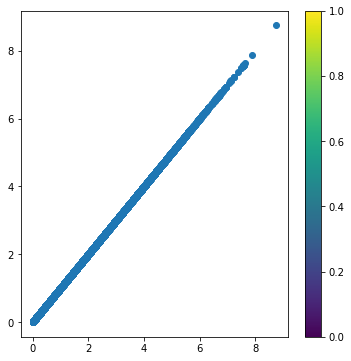

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(val_encode[:, :], val_encode[:, :])
plt.colorbar()
plt.show()

In [27]:
val_encode_df = pd.DataFrame(val_encode)
val_encode_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.160812,0.702376,1.826283,0.070483,2.379605,0.0,0.315229,0.000000,0.745975,1.606460,...,0.659600,2.613026,0.217506,2.660992,3.650507,1.895083,1.215869,1.655062,1.252426,1.994516
1,1.830713,1.299031,2.827974,0.773668,3.418776,0.0,2.422769,0.279148,0.451877,0.110715,...,1.050494,2.773801,2.208181,3.877333,4.353286,0.376468,1.152847,0.281889,1.411207,1.251945
2,0.723097,3.877661,3.058774,0.566229,3.005013,0.0,0.051266,1.975427,0.217108,0.000000,...,0.238015,0.224763,1.527651,3.695491,4.489433,1.267462,0.980352,1.831583,1.644332,3.562235
3,1.319847,0.874532,3.826420,0.593425,3.193208,0.0,0.000000,2.089211,1.337028,0.508158,...,1.499055,0.000000,1.417923,2.732662,2.437556,2.723172,0.000000,1.527535,0.437404,2.085263
4,2.897877,0.160974,2.582344,0.373056,3.052699,0.0,0.876786,0.000000,1.993815,4.044471,...,1.078064,4.584823,1.536940,3.385062,4.425127,3.917932,1.746897,2.050241,1.952030,1.620024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,1.387571,3.701067,3.436297,0.713277,2.880716,0.0,1.513215,2.407779,2.422989,1.501756,...,1.571257,1.976123,3.341525,2.811006,5.955709,2.899572,2.129996,2.093030,1.566517,2.736027
931,2.831361,2.731905,3.412751,0.971666,2.699569,0.0,3.641780,2.886727,1.724109,2.706757,...,3.224768,2.851137,4.704193,2.255933,4.824239,2.652613,3.096685,1.063173,1.317709,2.316168
932,2.594126,1.276027,0.000000,0.376698,2.051559,0.0,2.165917,2.785203,0.166379,3.525016,...,3.747175,1.908190,4.824211,1.065796,2.344577,2.191438,2.762595,0.569525,1.726421,1.344647
933,2.014281,2.630730,4.114912,0.681983,0.295765,0.0,3.169341,1.979973,1.175908,2.783127,...,1.057004,2.688292,2.035194,2.976359,0.179143,3.286419,1.043921,0.200325,0.232417,2.168765


In [28]:
val_encode_df.to_excel('./rae_ls32_{}_latent_vector_val.xlsx'.format(version))

In [29]:
val_decode = decoder.predict(val_encode)
val_decode

array([[1.35320255e-17, 5.58943759e-11, 6.92794780e-12, ...,
        2.31080999e-09, 1.24358135e-10, 2.31380448e-09],
       [3.10882379e-27, 7.12984557e-17, 2.75376479e-32, ...,
        4.06110013e-17, 3.46415670e-16, 5.68352501e-15],
       [3.96223578e-22, 4.92814323e-09, 1.95068206e-29, ...,
        1.83192739e-07, 3.97139035e-22, 7.77819215e-13],
       ...,
       [2.15258193e-12, 2.99467673e-11, 4.10120649e-08, ...,
        4.13640510e-14, 2.60522914e-09, 3.34648178e-07],
       [8.60775326e-05, 2.27930062e-02, 3.63040604e-23, ...,
        1.47510627e-05, 3.63102735e-24, 3.34430118e-12],
       [8.18226389e-11, 5.63542879e-10, 8.42928529e-01, ...,
        3.94027318e-15, 2.55768171e-13, 1.41870560e-11]], dtype=float32)

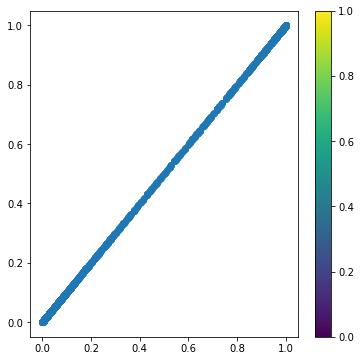

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(val_decode[:, :], val_decode[:, :])
plt.colorbar()
plt.show()

In [31]:
val_predict = val_decode.round()
val_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
"""val_predict = np.where(val_decode > 0.5, 1, 0)
val_predict"""

'val_predict = np.where(val_decode > 0.5, 1, 0)\nval_predict'

In [33]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [34]:
#c_matrix.shape

In [35]:
#c_matrix

In [36]:
print('accuracy : ', accuracy_score(one_hot_val_labels, val_predict))
print('precision : ', precision_score(one_hot_val_labels, val_predict, average='micro'))
print('recall : ', recall_score(one_hot_val_labels, val_predict, average='micro'))
print('f1 : ', f1_score(one_hot_val_labels, val_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_val_labels, val_predict))

accuracy :  0.7732620320855615
precision :  0.9258720930232558
recall :  0.7908131595282434
f1 :  0.8530297957817208
------------------------
hamming_loss :  0.001792056170143283


In [37]:
val_predict_df = pd.DataFrame(val_predict)
val_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#val_predict_df.to_excel('./val_latent_vector.xlsx')

### test data

In [39]:
test_encode = encoder.predict(one_hot_test_labels)
test_encode

array([[2.721272  , 0.64589626, 4.298009  , ..., 0.5652358 , 0.        ,
        1.0637488 ],
       [1.959765  , 0.6266017 , 4.5171227 , ..., 1.1553918 , 0.99646187,
        1.7452358 ],
       [1.9573255 , 3.5218632 , 2.2221904 , ..., 1.1943856 , 2.7180872 ,
        3.6416292 ],
       ...,
       [2.7144542 , 1.6737882 , 0.        , ..., 0.7422901 , 3.0416589 ,
        1.1978155 ],
       [3.2132478 , 0.9959459 , 2.7978706 , ..., 0.02785845, 1.6012096 ,
        2.5772095 ],
       [2.200617  , 0.84291583, 2.4978282 , ..., 0.81160504, 2.201858  ,
        3.0676765 ]], dtype=float32)

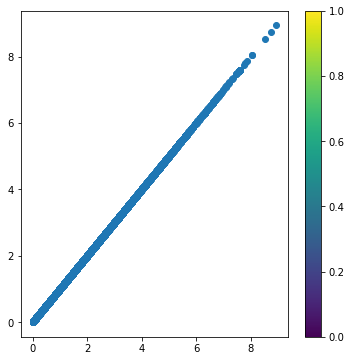

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(test_encode[:, :], test_encode[:, :])
plt.colorbar()
plt.show()

In [41]:
test_encode_df = pd.DataFrame(test_encode)
test_encode_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.721272,0.645896,4.298009,0.091566,1.257981,0.0,2.013318,1.731955,2.479199,3.847471,...,1.354994,2.312873,2.890211,2.014307,1.847732,5.673225,1.020746,0.565236,0.000000,1.063749
1,1.959765,0.626602,4.517123,0.869072,3.517265,0.0,2.748332,1.154613,3.767540,2.511817,...,2.489295,3.683540,2.161397,2.854535,5.056381,1.238201,0.931779,1.155392,0.996462,1.745236
2,1.957325,3.521863,2.222190,0.223836,2.106490,0.0,2.032464,1.760850,0.163494,1.658984,...,1.079385,2.673229,3.130688,2.876190,3.573605,0.368269,2.141461,1.194386,2.718087,3.641629
3,1.387571,3.701068,3.436297,0.713277,2.880716,0.0,1.513215,2.407779,2.422989,1.501756,...,1.571257,1.976123,3.341526,2.811006,5.955709,2.899572,2.129996,2.093030,1.566517,2.736027
4,0.703739,2.954461,2.771776,0.833788,1.774965,0.0,0.097611,2.249922,1.318498,0.000000,...,0.593649,0.000000,1.968887,2.441638,3.184179,1.979293,0.447488,1.360672,0.692212,0.601506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2.998761,2.426008,3.340866,0.000000,1.929126,0.0,1.355311,1.899159,1.465890,2.361195,...,0.710930,2.244099,3.783546,1.620312,4.401006,1.960070,2.434037,1.895536,2.504398,2.101616
931,3.354524,1.159952,3.526752,0.000000,1.252942,0.0,1.501508,1.826950,1.973675,3.578372,...,1.144366,2.221884,3.508570,1.472551,2.723095,4.782733,1.848716,1.308293,0.793596,1.098957
932,2.714454,1.673788,0.000000,0.000000,1.821686,0.0,1.185407,2.911188,0.637718,3.822897,...,1.139254,1.647037,7.096872,1.583680,2.399300,3.760466,1.740469,0.742290,3.041659,1.197816
933,3.213248,0.995946,2.797871,0.109383,1.458100,0.0,2.178684,3.220061,0.931835,3.105134,...,1.223520,1.225312,4.065963,2.213822,0.000000,2.059089,0.000000,0.027858,1.601210,2.577209


In [42]:
test_encode_df.to_excel('./rae_ls32_{}_latent_vector_test.xlsx'.format(version))

In [43]:
test_decode = decoder.predict(test_encode)
test_decode

array([[2.18972161e-07, 4.17080780e-12, 9.98565733e-01, ...,
        2.21556450e-19, 9.60026973e-15, 6.64932713e-08],
       [7.02974907e-27, 4.80370407e-19, 3.36126835e-15, ...,
        1.67048957e-19, 7.09013106e-19, 6.88823130e-13],
       [3.98853365e-21, 6.24910745e-09, 3.30390643e-32, ...,
        1.64213234e-05, 8.61061999e-22, 1.94860499e-16],
       ...,
       [2.47453533e-13, 6.90957166e-14, 1.06635298e-05, ...,
        1.36100989e-16, 8.61951163e-14, 1.71907641e-13],
       [1.40057750e-07, 9.82582726e-09, 3.38364448e-09, ...,
        1.00947419e-08, 1.75478515e-13, 3.98118826e-15],
       [4.45727609e-14, 4.22357158e-12, 1.08718226e-08, ...,
        1.22755983e-08, 4.79875649e-20, 3.99086078e-14]], dtype=float32)

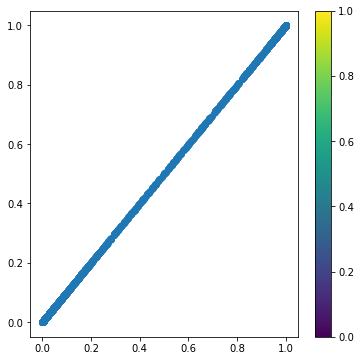

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [45]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [47]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [48]:
#c_matrix.shape

In [49]:
#c_matrix

In [50]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.7647058823529411
precision :  0.9171309192200557
recall :  0.7928958458759783
f1 :  0.8505004843396835
------------------------
hamming_loss :  0.0018900273502877904


In [51]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.7647058823529411
precision :  0.9096052966641203
recall :  0.8665953654188948
f1 :  0.8773904467487356
------------------------
hamming_loss :  0.0018900273502877904


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')